In [1]:
from scripts.helpgauss import default_train
import matplotlib.pyplot as plt
import random

from IPython.display import SVG, display
from ipywidgets import interact
import os

PATH_TO_SVG = 'imgs/svg/test'

Training on cuda:0: 100%|██████████| 100/100 [00:05<00:00, 17.73it/s]


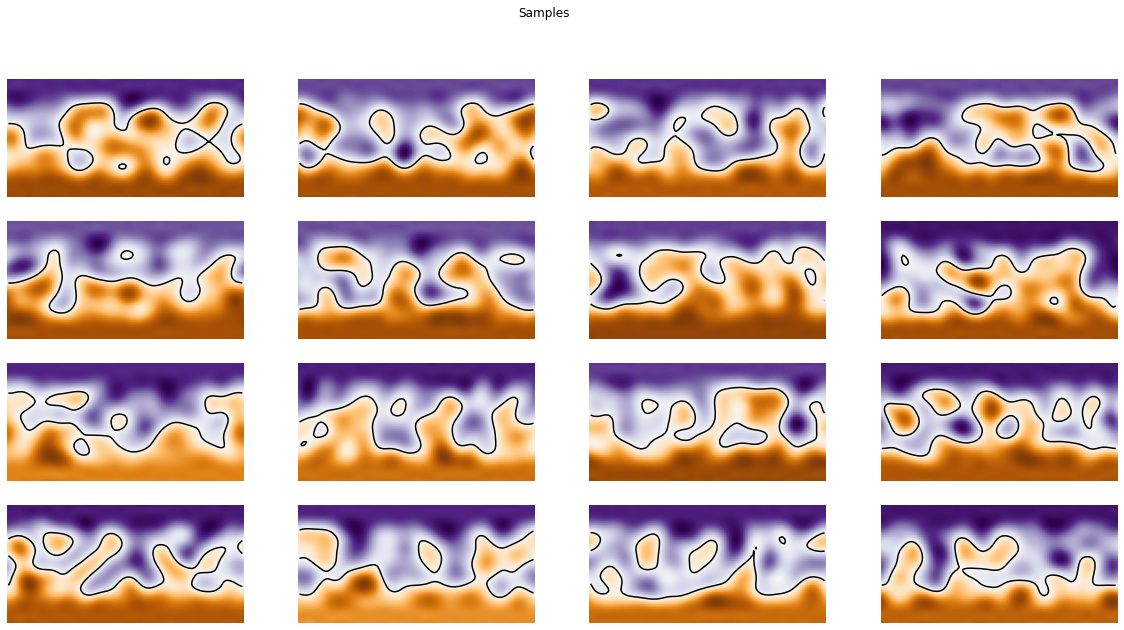

In [5]:
model, x_test = default_train(need_plot=False)
samples = model.predict(x_test, num_samples=200)

In [3]:
os.makedirs(PATH_TO_SVG, exist_ok=True)

for i, sample in enumerate(samples): 
    plt.axis('off')
    plt.contour(sample, levels=0, colors='k')
    plt.savefig(
        f'{PATH_TO_SVG}/{i:03d}.svg',
        bbox_inches='tight',
        pad_inches=0)
    plt.close()

In [ ]:
@interact(fname=os.listdir(PATH_TO_SVG), segment_len=(1, 100), padding_coef=(0, 1, 0.01))
def erase(fname, segment_len=40, padding_coef=0.5):
    with open(os.path.join(PATH_TO_SVG, fname), 'r') as f:
        svg = f.readlines()
    idxs = [i for i, line in enumerate(svg) if line[0] == 'L' \
            and ((svg[i-1][0] == 'L') + (svg[i+1][0] == 'L') == 1)][2:]
    display(SVG(''.join(svg)))
    for i in range(len(idxs)//2):
        start, end = idxs[2*i], idxs[2*i+1]
        l = end - start
        parts = (l+segment_len - 1)//segment_len
        for j in range(parts):
            if j == parts - 1:
                l = l % segment_len if l % segment_len else segment_len
                r = random.randint(0, int(l * padding_coef))
                dx = random.randint(0, l - r - 1)
            else:
                r = random.randint(0, int(segment_len * padding_coef))
                dx = random.randint(0, segment_len - 1 - r)
            reper = start + segment_len*j + r
            svg[reper:reper+dx] = ['\n' for _ in range(dx)]
            svg[reper + dx - 1] = svg[reper + dx].replace('L', 'M')
    svg = ''.join(svg).replace('z\n', '')
    display(SVG(svg))

interactive(children=(Dropdown(description='fname', options=('000.svg', '001.svg', '002.svg', '003.svg', '004.…